In [2]:
import pandas as pd

In [3]:
train = pd.read_csv('data/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


https://www.kaggle.com/c/titanic/data
## Data Dictionary
+ survival	Survival	0 = No, 1 = Yes
+ pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
+ sex	Sex	male or feamale
+ age	Age in years	
+ sibsp	# of siblings / spouses aboard the Titanic	
+ parch	# of parents / children aboard the Titanic
+ ticket	Ticket number	
+ fare	Passenger fare	
+ cabin	Cabin number	
+ embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

## Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [4]:
train['Sex'][train['Sex'] == 'male'] = 0
train['Sex'][train['Sex'] == 'female'] = 1
train['Sex'] = train['Sex'].astype(int)

train['Embarked'][train['Embarked'] == 'C'] = 1
train['Embarked'][train['Embarked'] == 'Q'] = 2
train['Embarked'][train['Embarked'] == 'S'] = 3
train.loc[:, 'Embarked'] = train['Embarked'].fillna(0)
train['Embarked'] = train['Embarked'].astype(int)

train.info()
train.head()

3.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


/Users/fujino/miniconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/fujino/miniconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/fujino/miniconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,3


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,2.529742
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.800254
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,2.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,3.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,3.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


0. passengerId
1. survived
1. pclass(int) 富裕層が助けられてそう いる
1. name(object) いらない
1. sex(object) 女性が優先されてそう いる
1. age(float) 子供が優先されてそう いる
1. sibsp(int) # of siblings / spouses aboard the Titanic 独身とか死んでそう いる
1. parch(int) # of parents / children aboard the Titanic 独身とか死んでそう いる
1. ticket(object) Ticket number 微妙 fareがあるのでどちらかというといらない 数値自体は関係ないのでなんらかの変換が必要
1. fare(float) Passenger fare 富裕層が助けられてそう いる (逆にpclassいらない?)
1. cabin(object) Cabin number 役に立つかもだが欠損多いし予測時にも役にたたなさそう
1. embarked(object) Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton わからん

In [9]:
import matplotlib.pyplot as plt

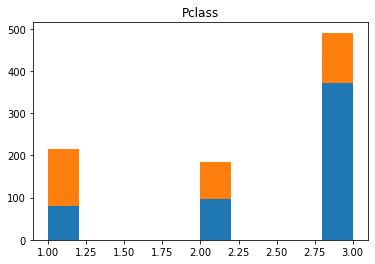

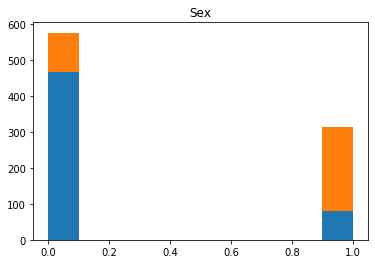

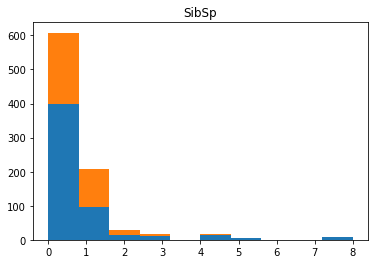

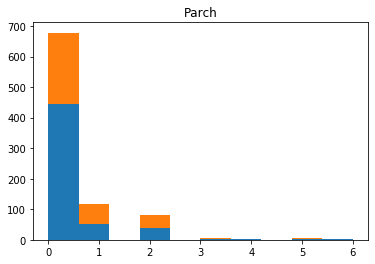

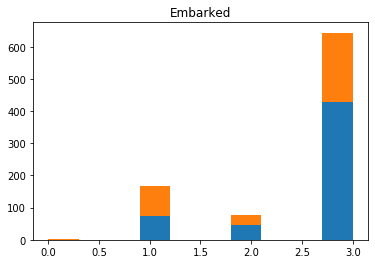

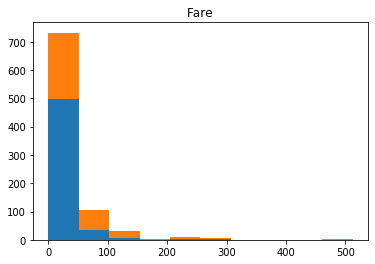

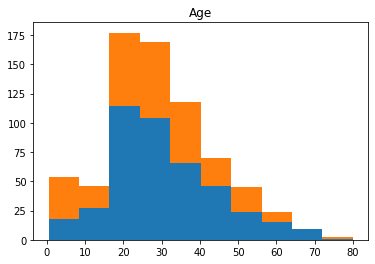

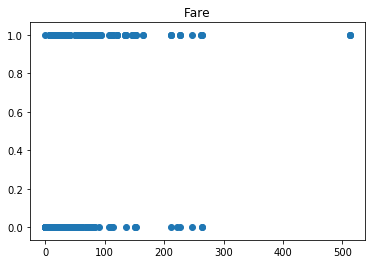

In [25]:
attrs = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Fare', 'Age'] 
for attr in attrs:
    plt.title(attr)
    plt.hist([train[attr][train['Survived'] == 0], train[attr][train['Survived'] == 1]],
             stacked=True)
    plt.show()
    
plt.title('Fare')
plt.scatter(train['Fare'], train['Survived'])
plt.show()

In [5]:
#欠損除去
drop_train = train.iloc[:, [0,1,2,4,5,6,7,9]].dropna()
drop_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Sex            714 non-null int64
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Fare           714 non-null float64
dtypes: float64(2), int64(6)
memory usage: 50.2 KB


In [14]:
# 欠損埋め
fill_train = train.iloc[:, [0,1,2,4,5,6,7,9]]
med = fill_train['Age'].median()
print(med)
fill_train.loc[:, 'Age'] = fill_train['Age'].fillna(med)
fill_train.info()

28.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


/Users/fujino/miniconda3/envs/tf/lib/python3.7/site-packages/pandas/core/indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [15]:
test = pd.read_csv('data/test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [17]:
fill_train.values

array([[  1.    ,   0.    ,   3.    , ...,   1.    ,   0.    ,   7.25  ],
       [  2.    ,   1.    ,   1.    , ...,   1.    ,   0.    ,  71.2833],
       [  3.    ,   1.    ,   3.    , ...,   0.    ,   0.    ,   7.925 ],
       ...,
       [889.    ,   0.    ,   3.    , ...,   1.    ,   2.    ,  23.45  ],
       [890.    ,   1.    ,   1.    , ...,   0.    ,   0.    ,  30.    ],
       [891.    ,   0.    ,   3.    , ...,   0.    ,   0.    ,   7.75  ]])

In [24]:
import numpy as np

d = (fill_train.values - np.mean(fill_train.values, axis=0)) / np.std(fill_train.values, axis=0)
print(d.shape)
print(d)

(891, 8)
[[-1.73010796 -0.78927234  0.82737724 ...  0.43279337 -0.47367361
  -0.50244517]
 [-1.72622007  1.2669898  -1.56610693 ...  0.43279337 -0.47367361
   0.78684529]
 [-1.72233219  1.2669898   0.82737724 ... -0.4745452  -0.47367361
  -0.48885426]
 ...
 [ 1.72233219 -0.78927234  0.82737724 ...  0.43279337  2.00893337
  -0.17626324]
 [ 1.72622007  1.2669898  -1.56610693 ... -0.4745452  -0.47367361
  -0.04438104]
 [ 1.73010796 -0.78927234  0.82737724 ... -0.4745452  -0.47367361
  -0.49237783]]
